In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib inline
import matplotlib.pyplot as pl
pl.ion()
import numpy as np
import sys
sys.path.append('../')

import os
import copy
from qiskit import *
from qiskit_utilities.utilities import *

from qiskit.visualization import plot_histogram

from newbeginning import *

In [2]:
backend = Aer.get_backend('statevector_simulator')

In [3]:
# from qiskit.providers.aer import StatevectorSimulator
# backend = StatevectorSimulator(device="gpu")

In [4]:
# FR = np.array([[1, 0],
#               [0, 1]])
# CR=np.array([1,1])

# # Normalize weights
# CR = CR/np.max(CR)

In [5]:
# FR = np.array([[1, 1],
#               [1, 1]])
# CR=np.array([1,10])

# # Normalize weights
# CR = CR/np.max(CR)

In [6]:
# FR = np.array([[1, 0,0, 0],
#               [0, 1,1, 0],
#               [0, 1,0, 1]])
# CR=np.array([1,1,1,1])
# # CR=np.random.rand(4)

# # Normalize weights
# CR = CR/np.max(CR)

In [7]:
FR = np.array([[1,1, 0],
              [1,0, 1]])
CR=np.array([1,1,1])
# CR=np.random.rand(4)

# Normalize weights
CR = CR/np.max(CR)

In [8]:
# from data.tailassignment_loader import *
# FR,CR = npy_loader(f'../data//tailassignment_samples/npy_samples/FRCR_6_24_3_1.npy')

# # Normalize weights
# CR = CR/np.max(CR)

In [9]:
# F, R  = np.shape(FR)

In [10]:
CR

array([1., 1., 1.])

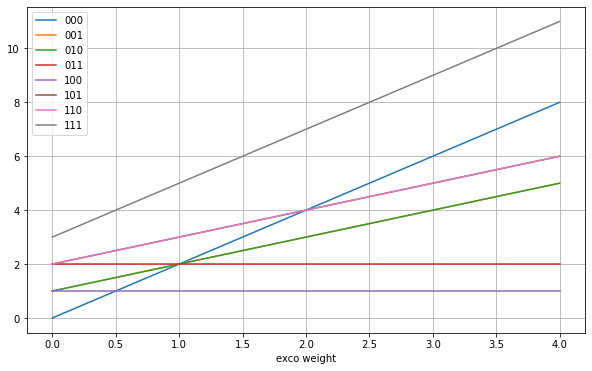

In [11]:
x, e, es, ue, lab = getSpectrum(CR, FR,mumax=4)

pl.figure(figsize=(10,6))
for key in ue:
    pl.plot(x,ue[key],label=lab[key])
pl.xlabel("exco weight")
pl.legend()
pl.grid()

# pl.figure(figsize=(10,6))
# for i in range(e.shape[0]):
#     pl.plot(x,es[i,:])
# pl.xlabel("exco weight")
# pl.grid()

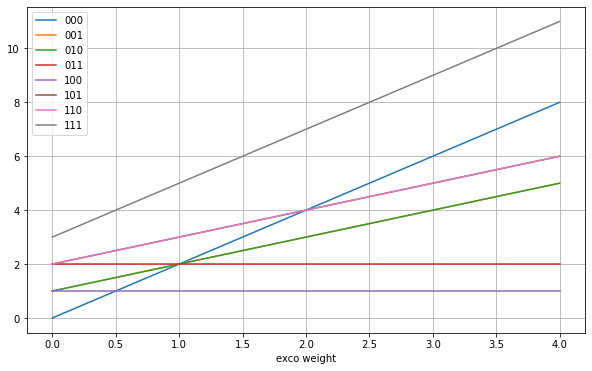

In [12]:
x, e, es, ue, lab = getSpectrum(CR, FR,mumax=4)

pl.figure(figsize=(10,6))
for key in ue:
    pl.plot(x,ue[key],label=lab[key])
pl.xlabel("exco weight")
pl.legend()
pl.grid()

# pl.figure(figsize=(10,6))
# for i in range(e.shape[0]):
#     pl.plot(x,es[i,:])
# pl.xlabel("exco weight")
# pl.grid()

In [13]:
def INTERP_init(params_prev_step):
    """
    Takes the optimal parameters at level p as input and returns the optimal inital guess for
    the optimal paramteres at level p+1. Uses the INTERP formula from the paper by Zhou et. al
    :param params_prev_step: optimal parameters at level p
    :return:
    """
    print("P=",params_prev_step)
    p = params_prev_step.shape[0]
    params_out_list = np.zeros(p+1)
    params_out_list[0] = params_prev_step[0]
    for i in range(2, p + 1):
        # Next line is clunky, but written this way to accommodate the 1-indexing in the paper
        params_out_list[i - 1] = (i - 1) / p * params_prev_step[i-2] + (p - i + 1) / p * params_prev_step[i-1]
    params_out_list[p] = params_prev_step[p-1]
    return params_out_list

Optimization terminated successfully.
         Current function value: 0.350485
         Iterations: 16
         Function evaluations: 29


(0.0, 1.0)

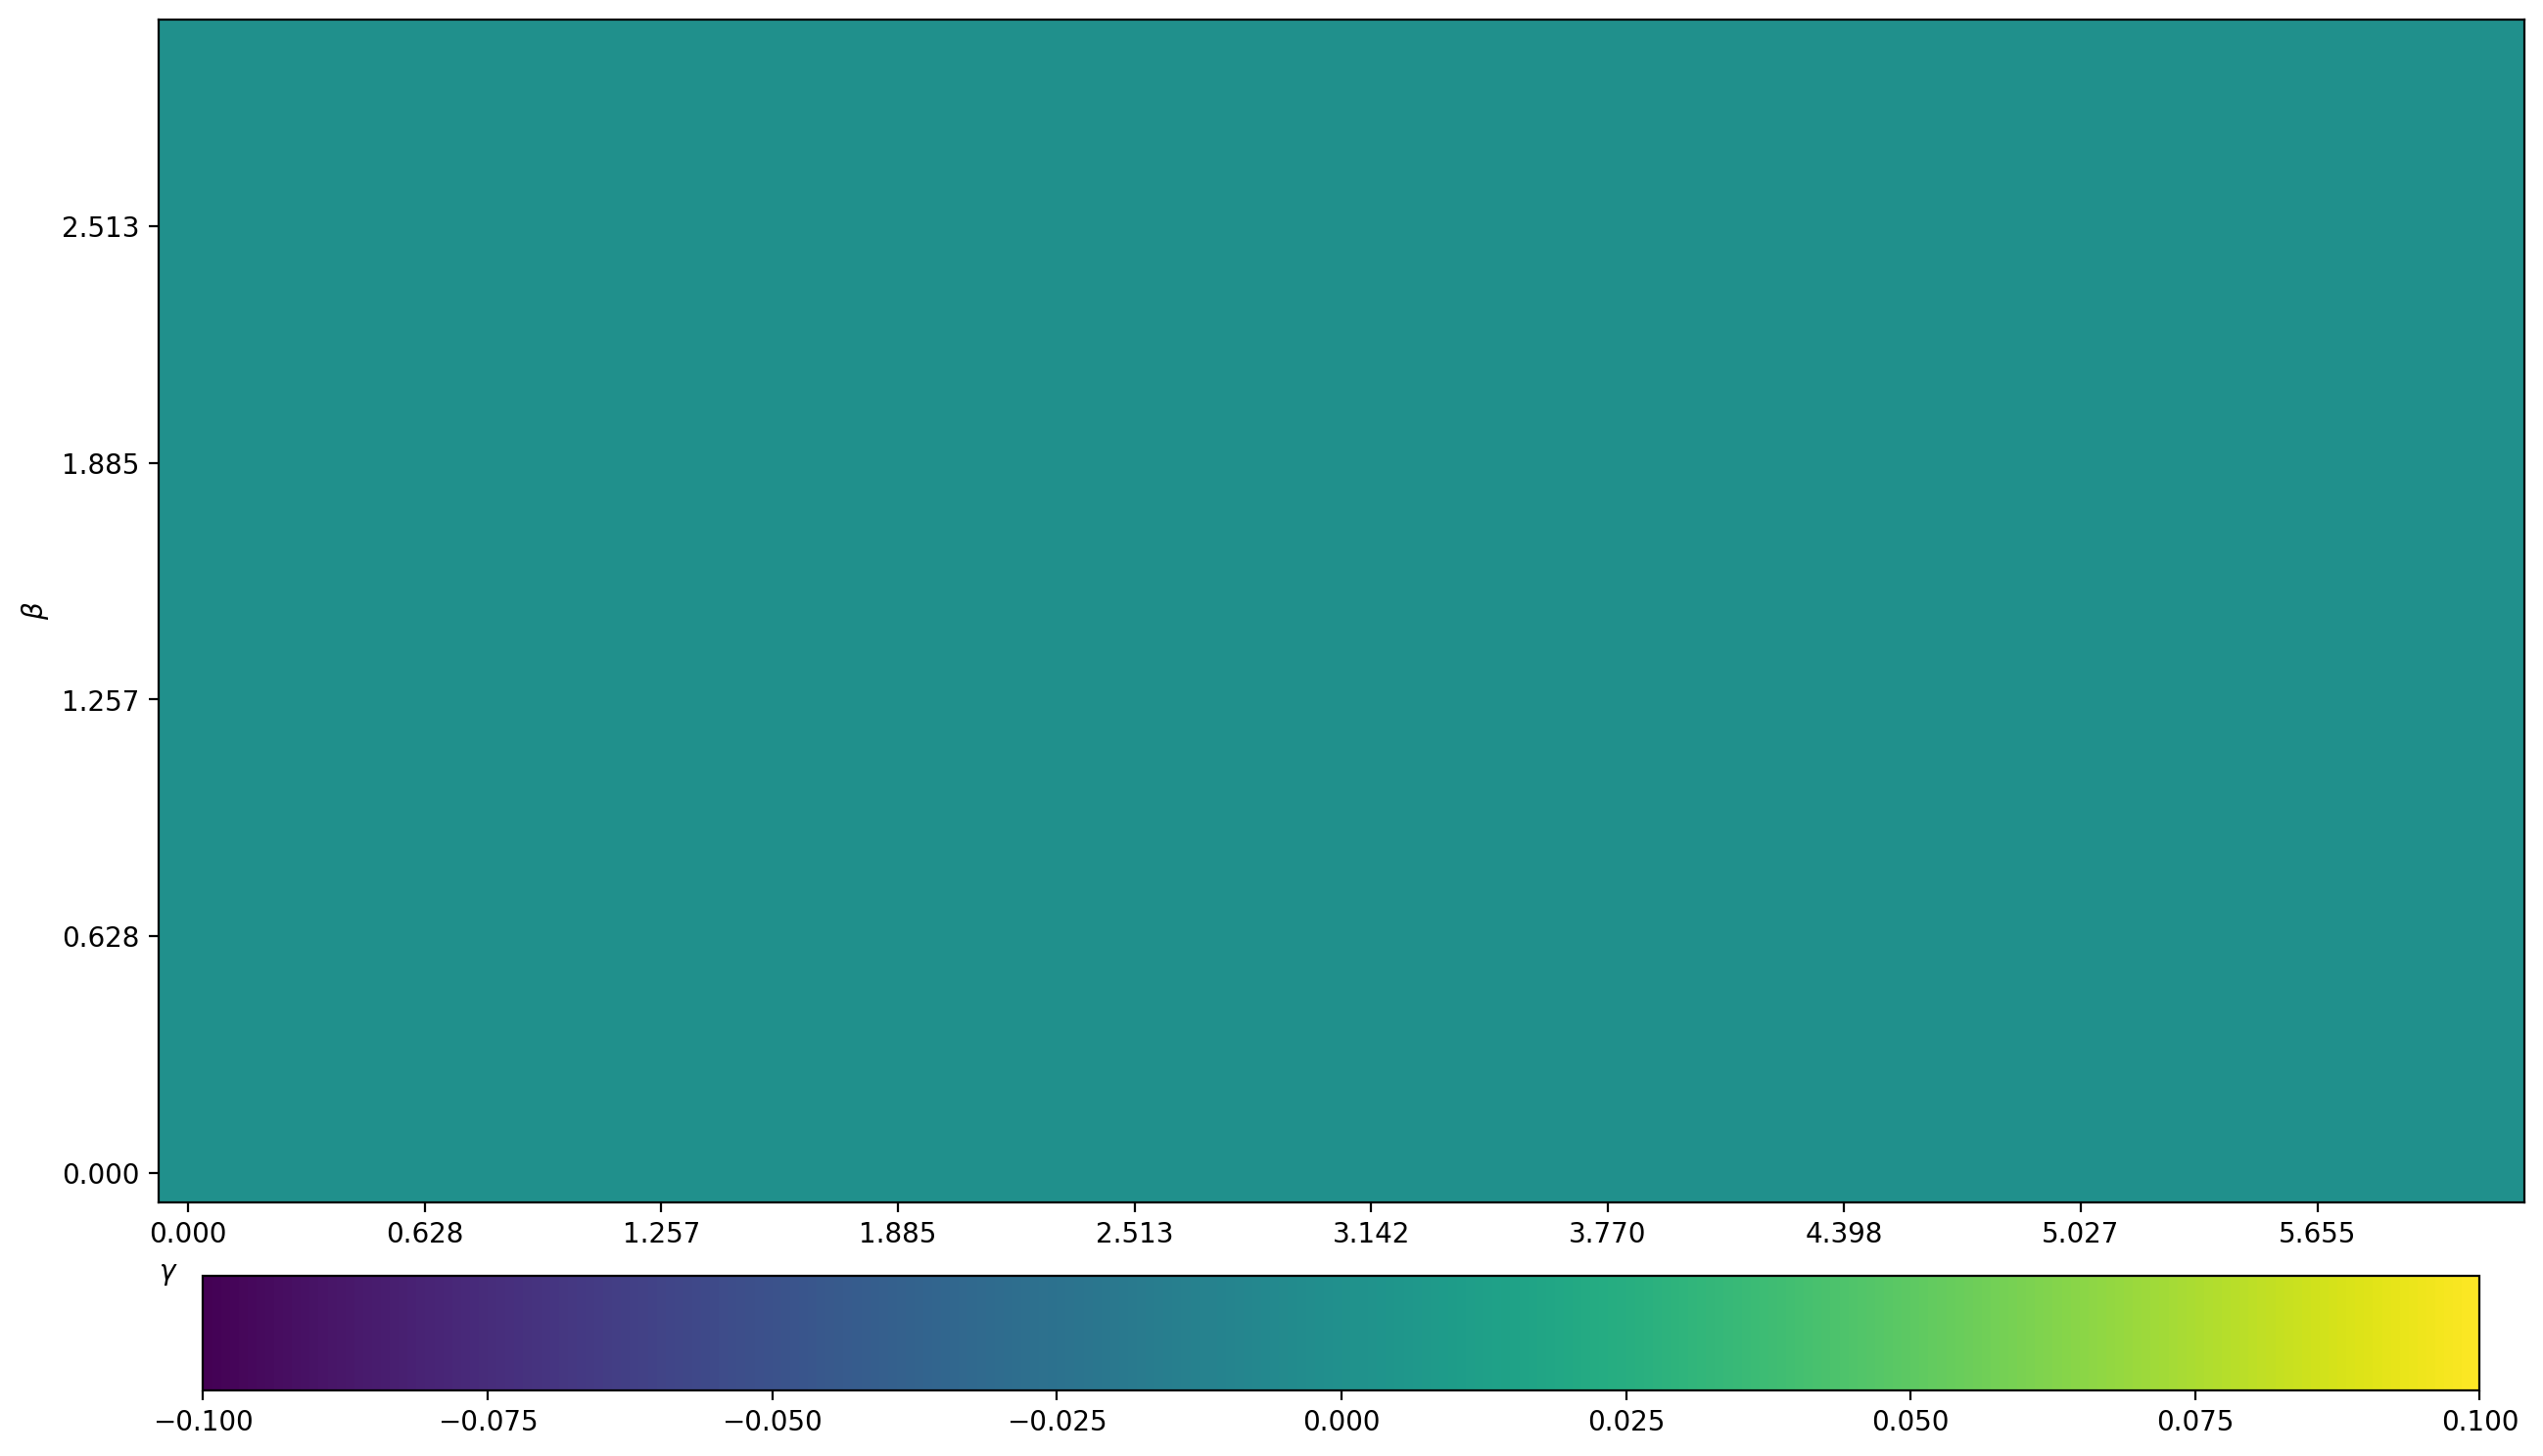

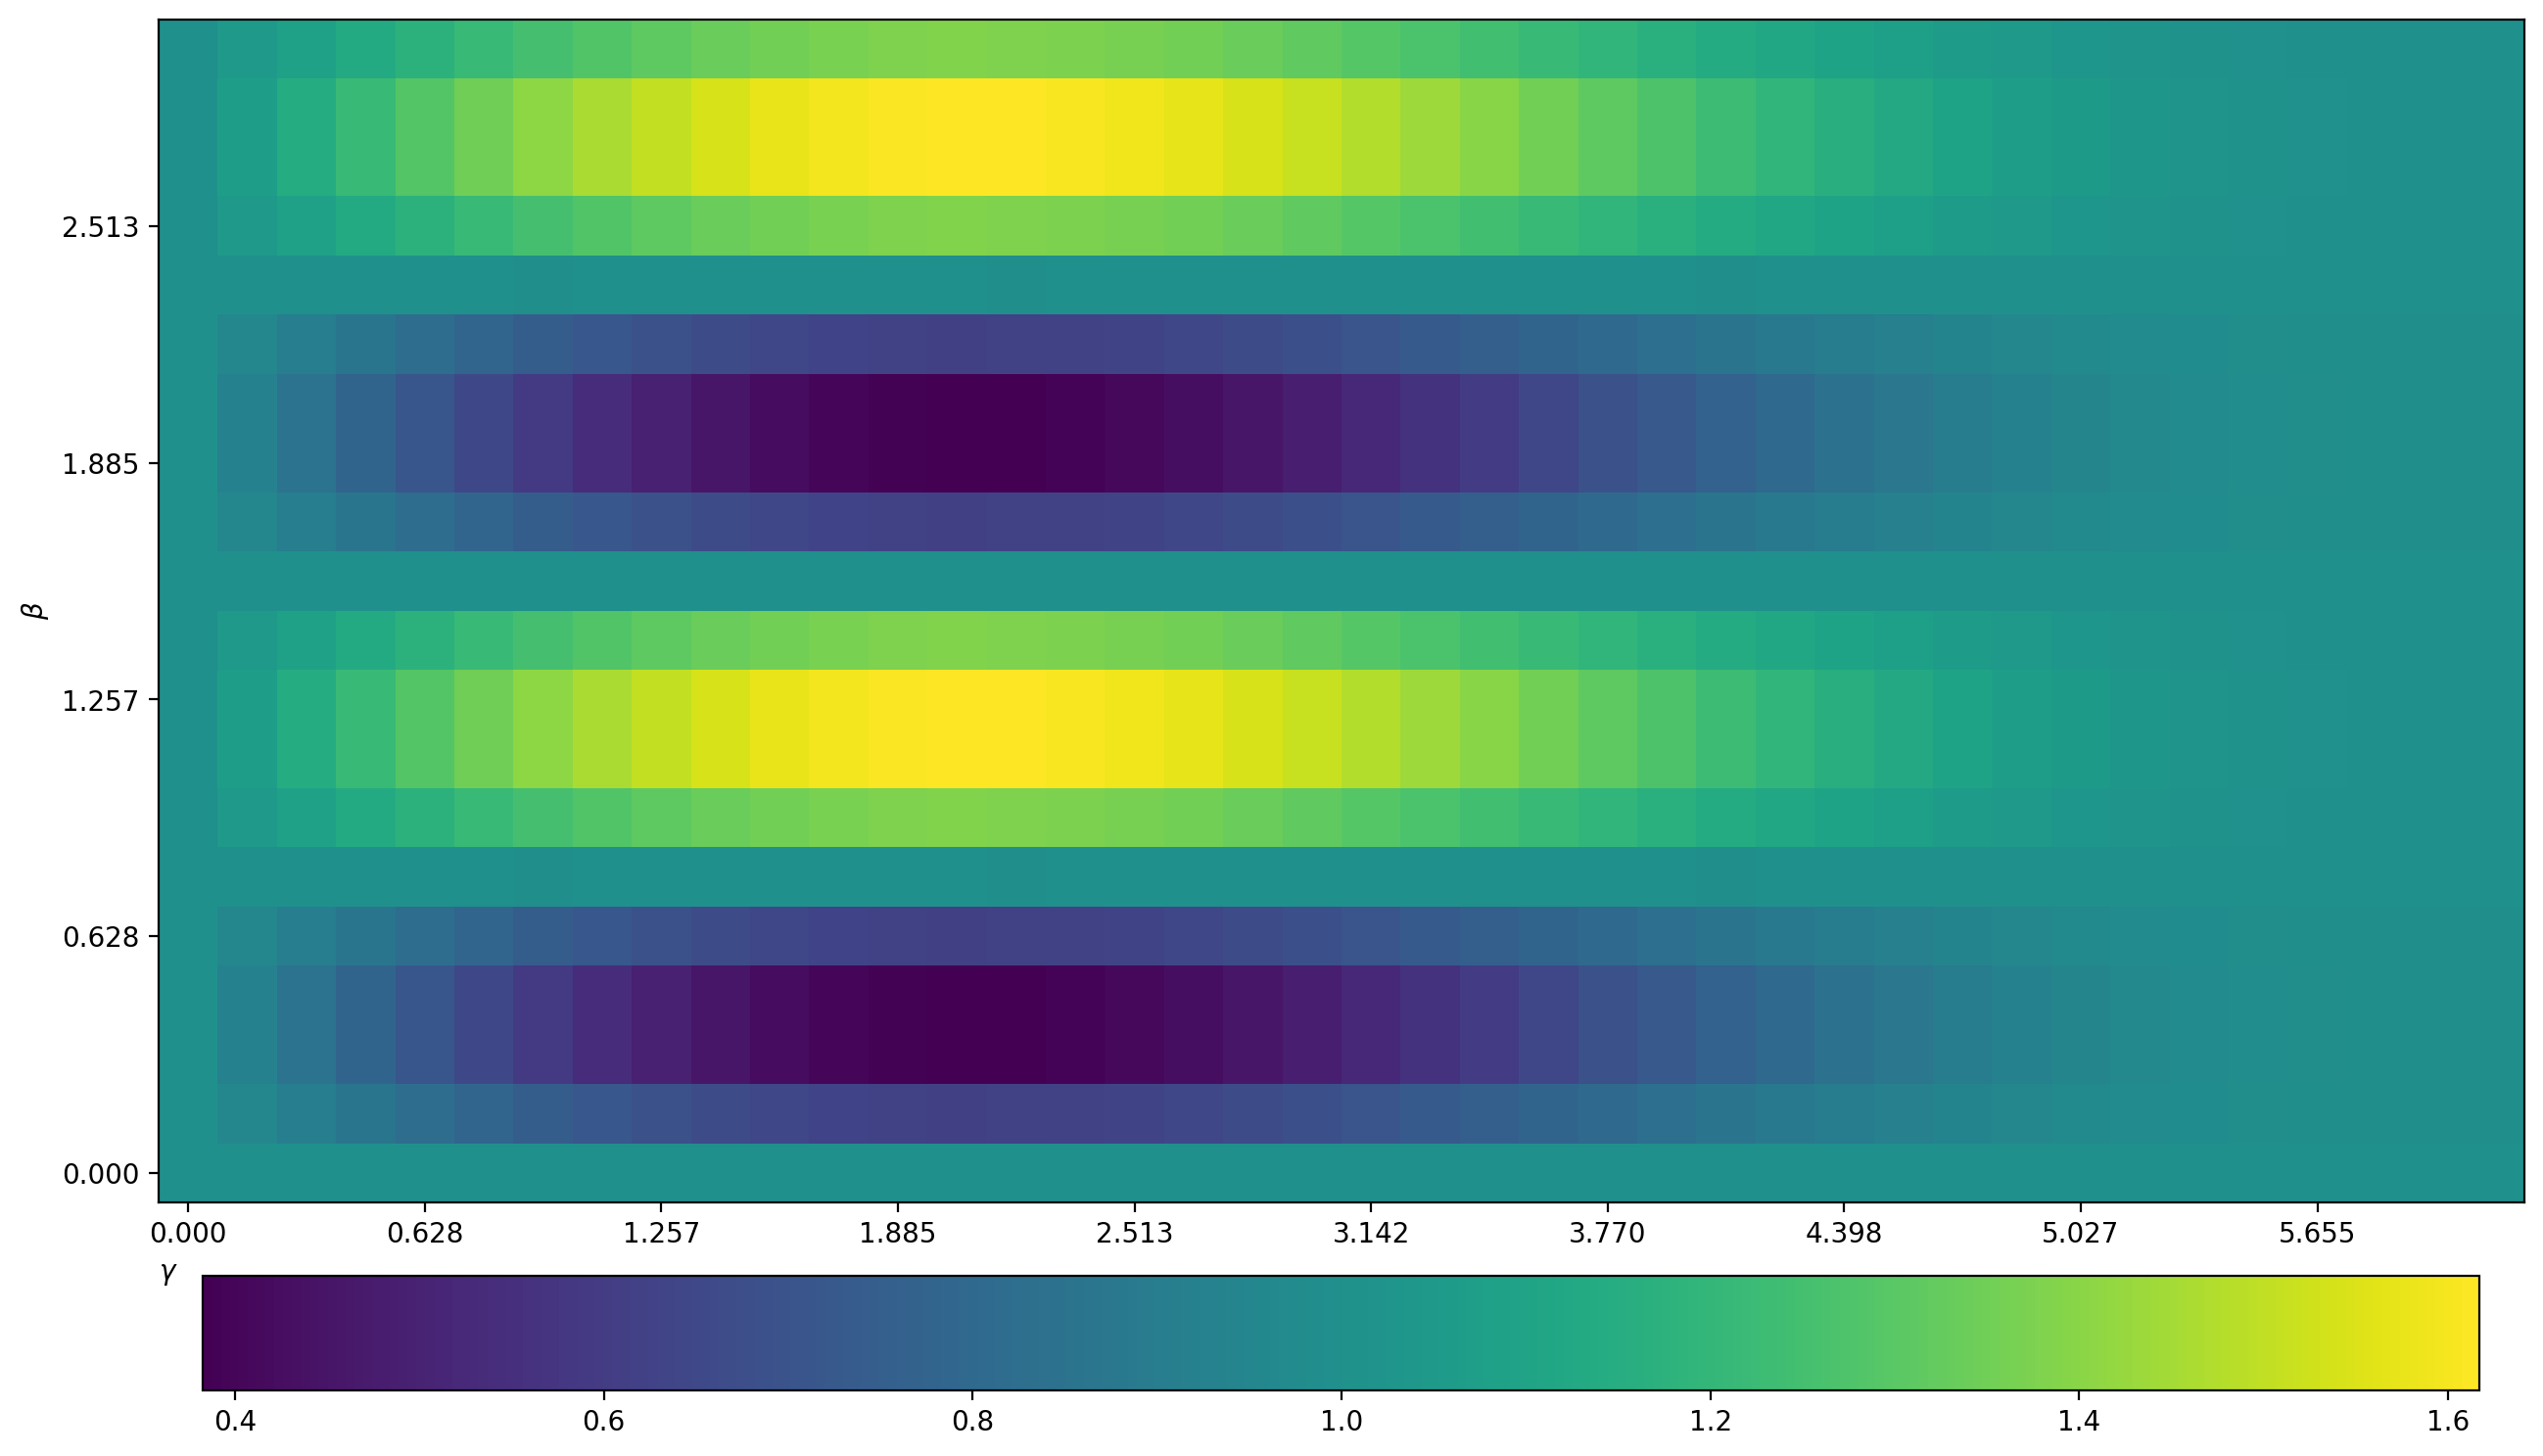

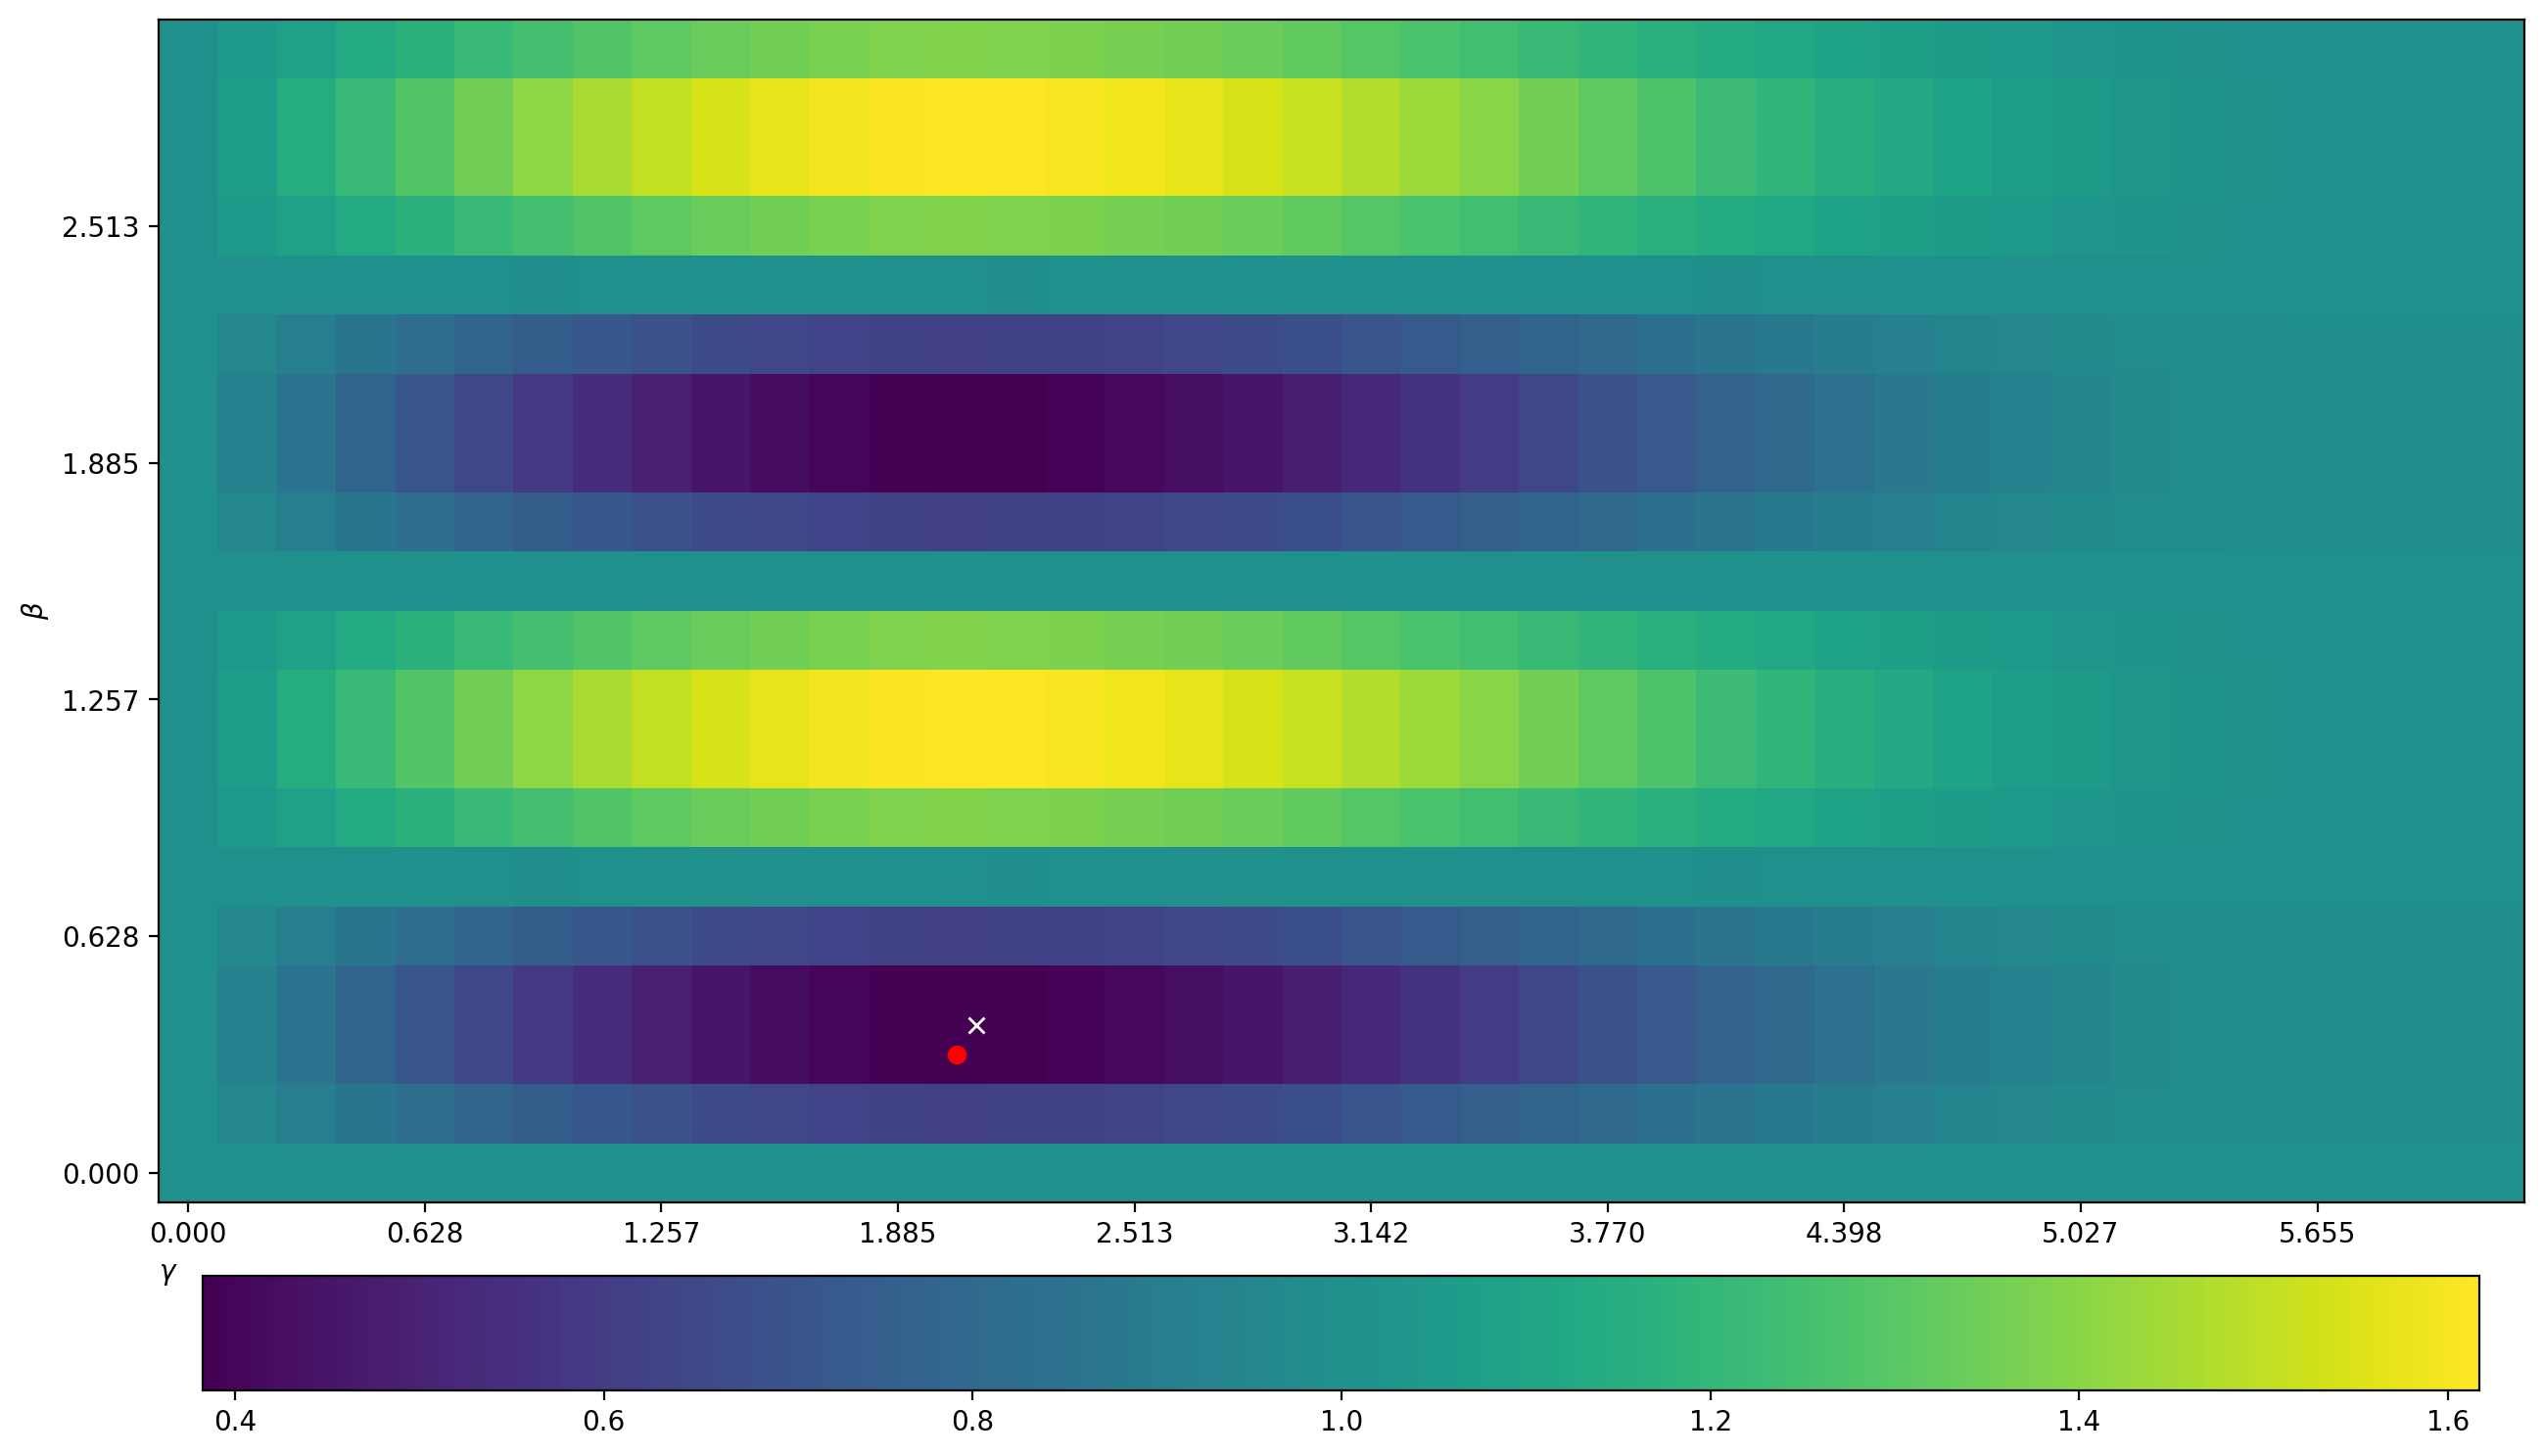

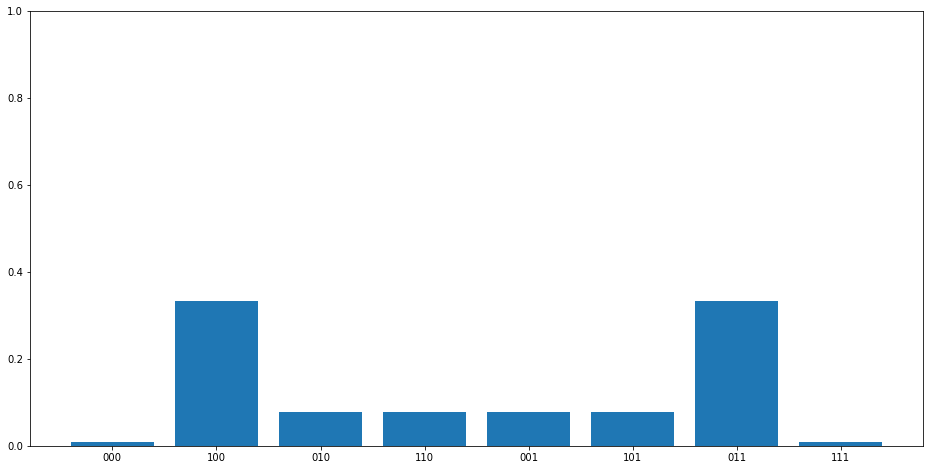

In [14]:
qaoa=QAOAChoose(None, FR)

mu=1

E, Ecost, Eexco, x0, job, ji = qaoa.getElandscape(backend,mu,useExco=[True])
out, job_b, xb = qaoa.getlocalmin(x0, backend, mu,useExco=[True])
        
# plot landscape
_=getfig(Ecost)
# plot landscape
_=getfig(Eexco)
# plot landscape
_=getfig(E)
pl.plot(x0[0],x0[1],'ro')
pl.plot(xb[0],xb[1],'wx')
        
# plot histogram
md=job_b.result().get_counts()
pl.figure(figsize=(16,8))
pl.bar([k[::-1] for k in md.keys()], md.values())
pl.ylim([0,1])

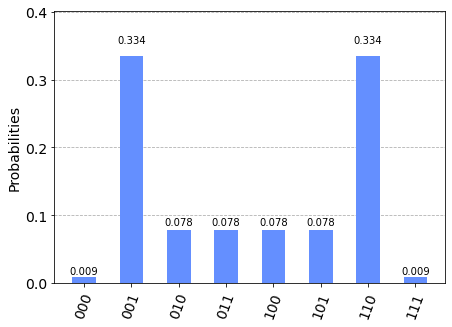

In [15]:
plot_histogram(job_b.result().get_counts())

In [16]:
depth=2
inter0 = INTERP_init(xb[::2])
inter1 = INTERP_init(xb[1::2])
xb_0 = np.zeros((2*depth))
xb_0[::2] = inter0
xb_0[1::2] = inter1
print(inter0)
print(inter1)

P= [2.09411786]
P= [0.39182969]
[2.09411786 2.09411786]
[0.39182969 0.39182969]


Optimization terminated successfully.
         Current function value: 0.000003
         Iterations: 74
         Function evaluations: 124


(0.0, 1.0)

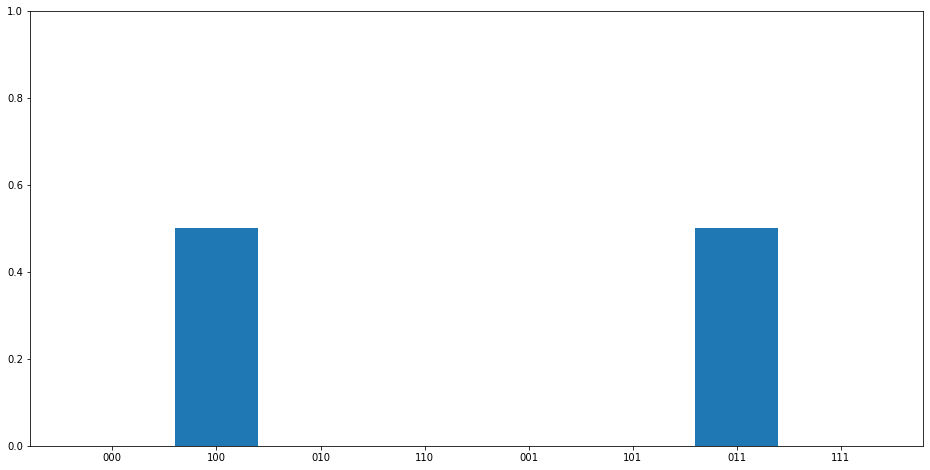

In [17]:
out2, job_b2, xb2 = qaoa.getlocalmin(xb_0, backend, mu,useExco=[True,True])
# plot histogram
md=job_b2.result().get_counts()
pl.figure(figsize=(16,8))
pl.bar([k[::-1] for k in md.keys()], md.values())
pl.ylim([0,1])

{'000': 6.36333673e-07, '001': 0.4999991211931, '010': 1.21236614e-07, '011': 1.21236614e-07, '100': 1.21236614e-07, '101': 1.21236614e-07, '110': 0.4999991211931, '111': 6.36333673e-07}
[-5.28388852e-04 -7.07105901e-01  1.24892368e-04  1.24892368e-04
  1.24892368e-04  1.24892368e-04 -7.07105901e-01 -5.28388852e-04]


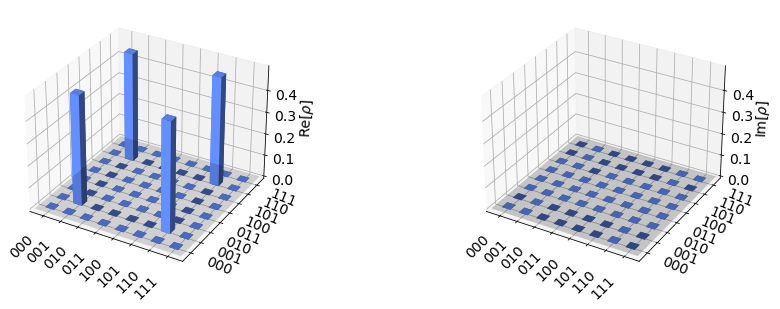

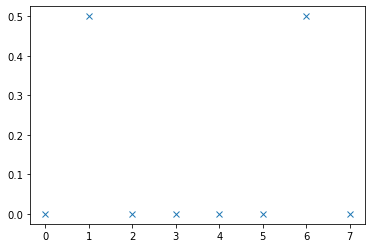

In [25]:
from qiskit.visualization import plot_state_city

sv=job_b2.result().results[0].data.statevector
print(job_b2.result().get_counts())

pl.figure()
pl.plot(np.abs(sv)**2,'x')
print(np.real(sv))
# sv=np.array((0,1,1.1,0), dtype=complex)
# sv/=np.linalg.norm(sv,2)

plot_state_city(sv)

Optimization terminated successfully.
         Current function value: 1.000007
         Iterations: 12
         Function evaluations: 24


(0.0, 1.0)

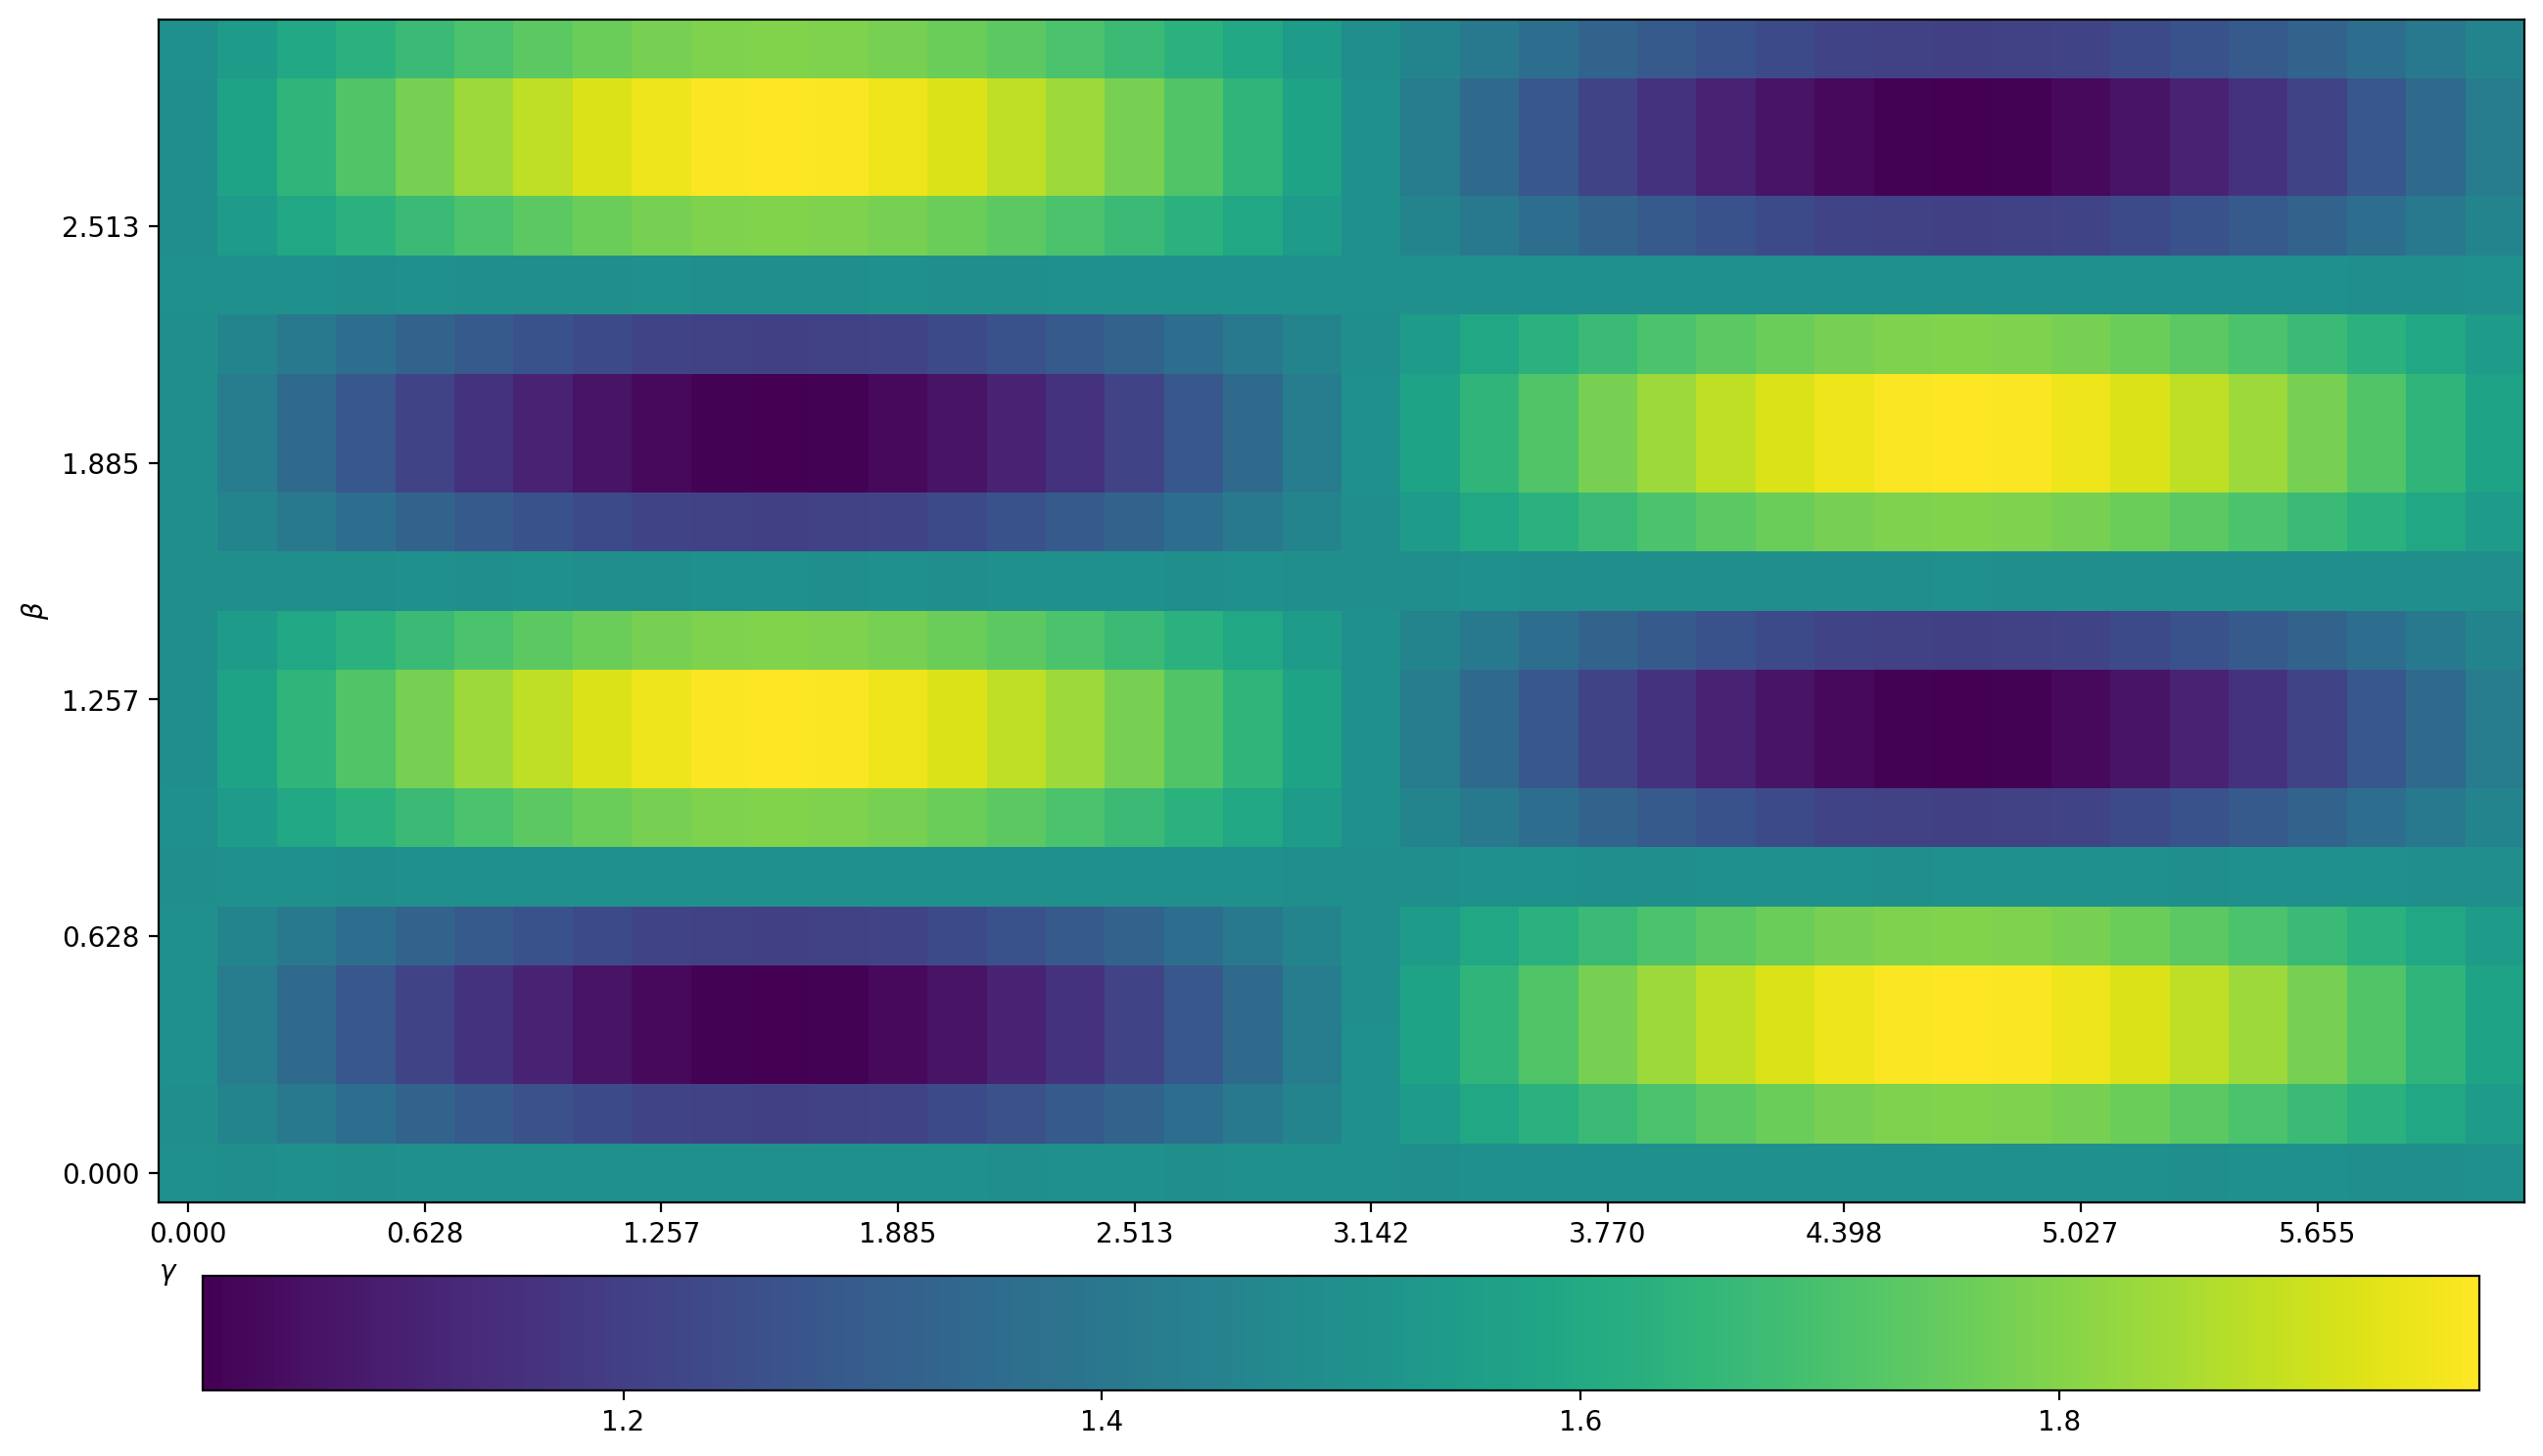

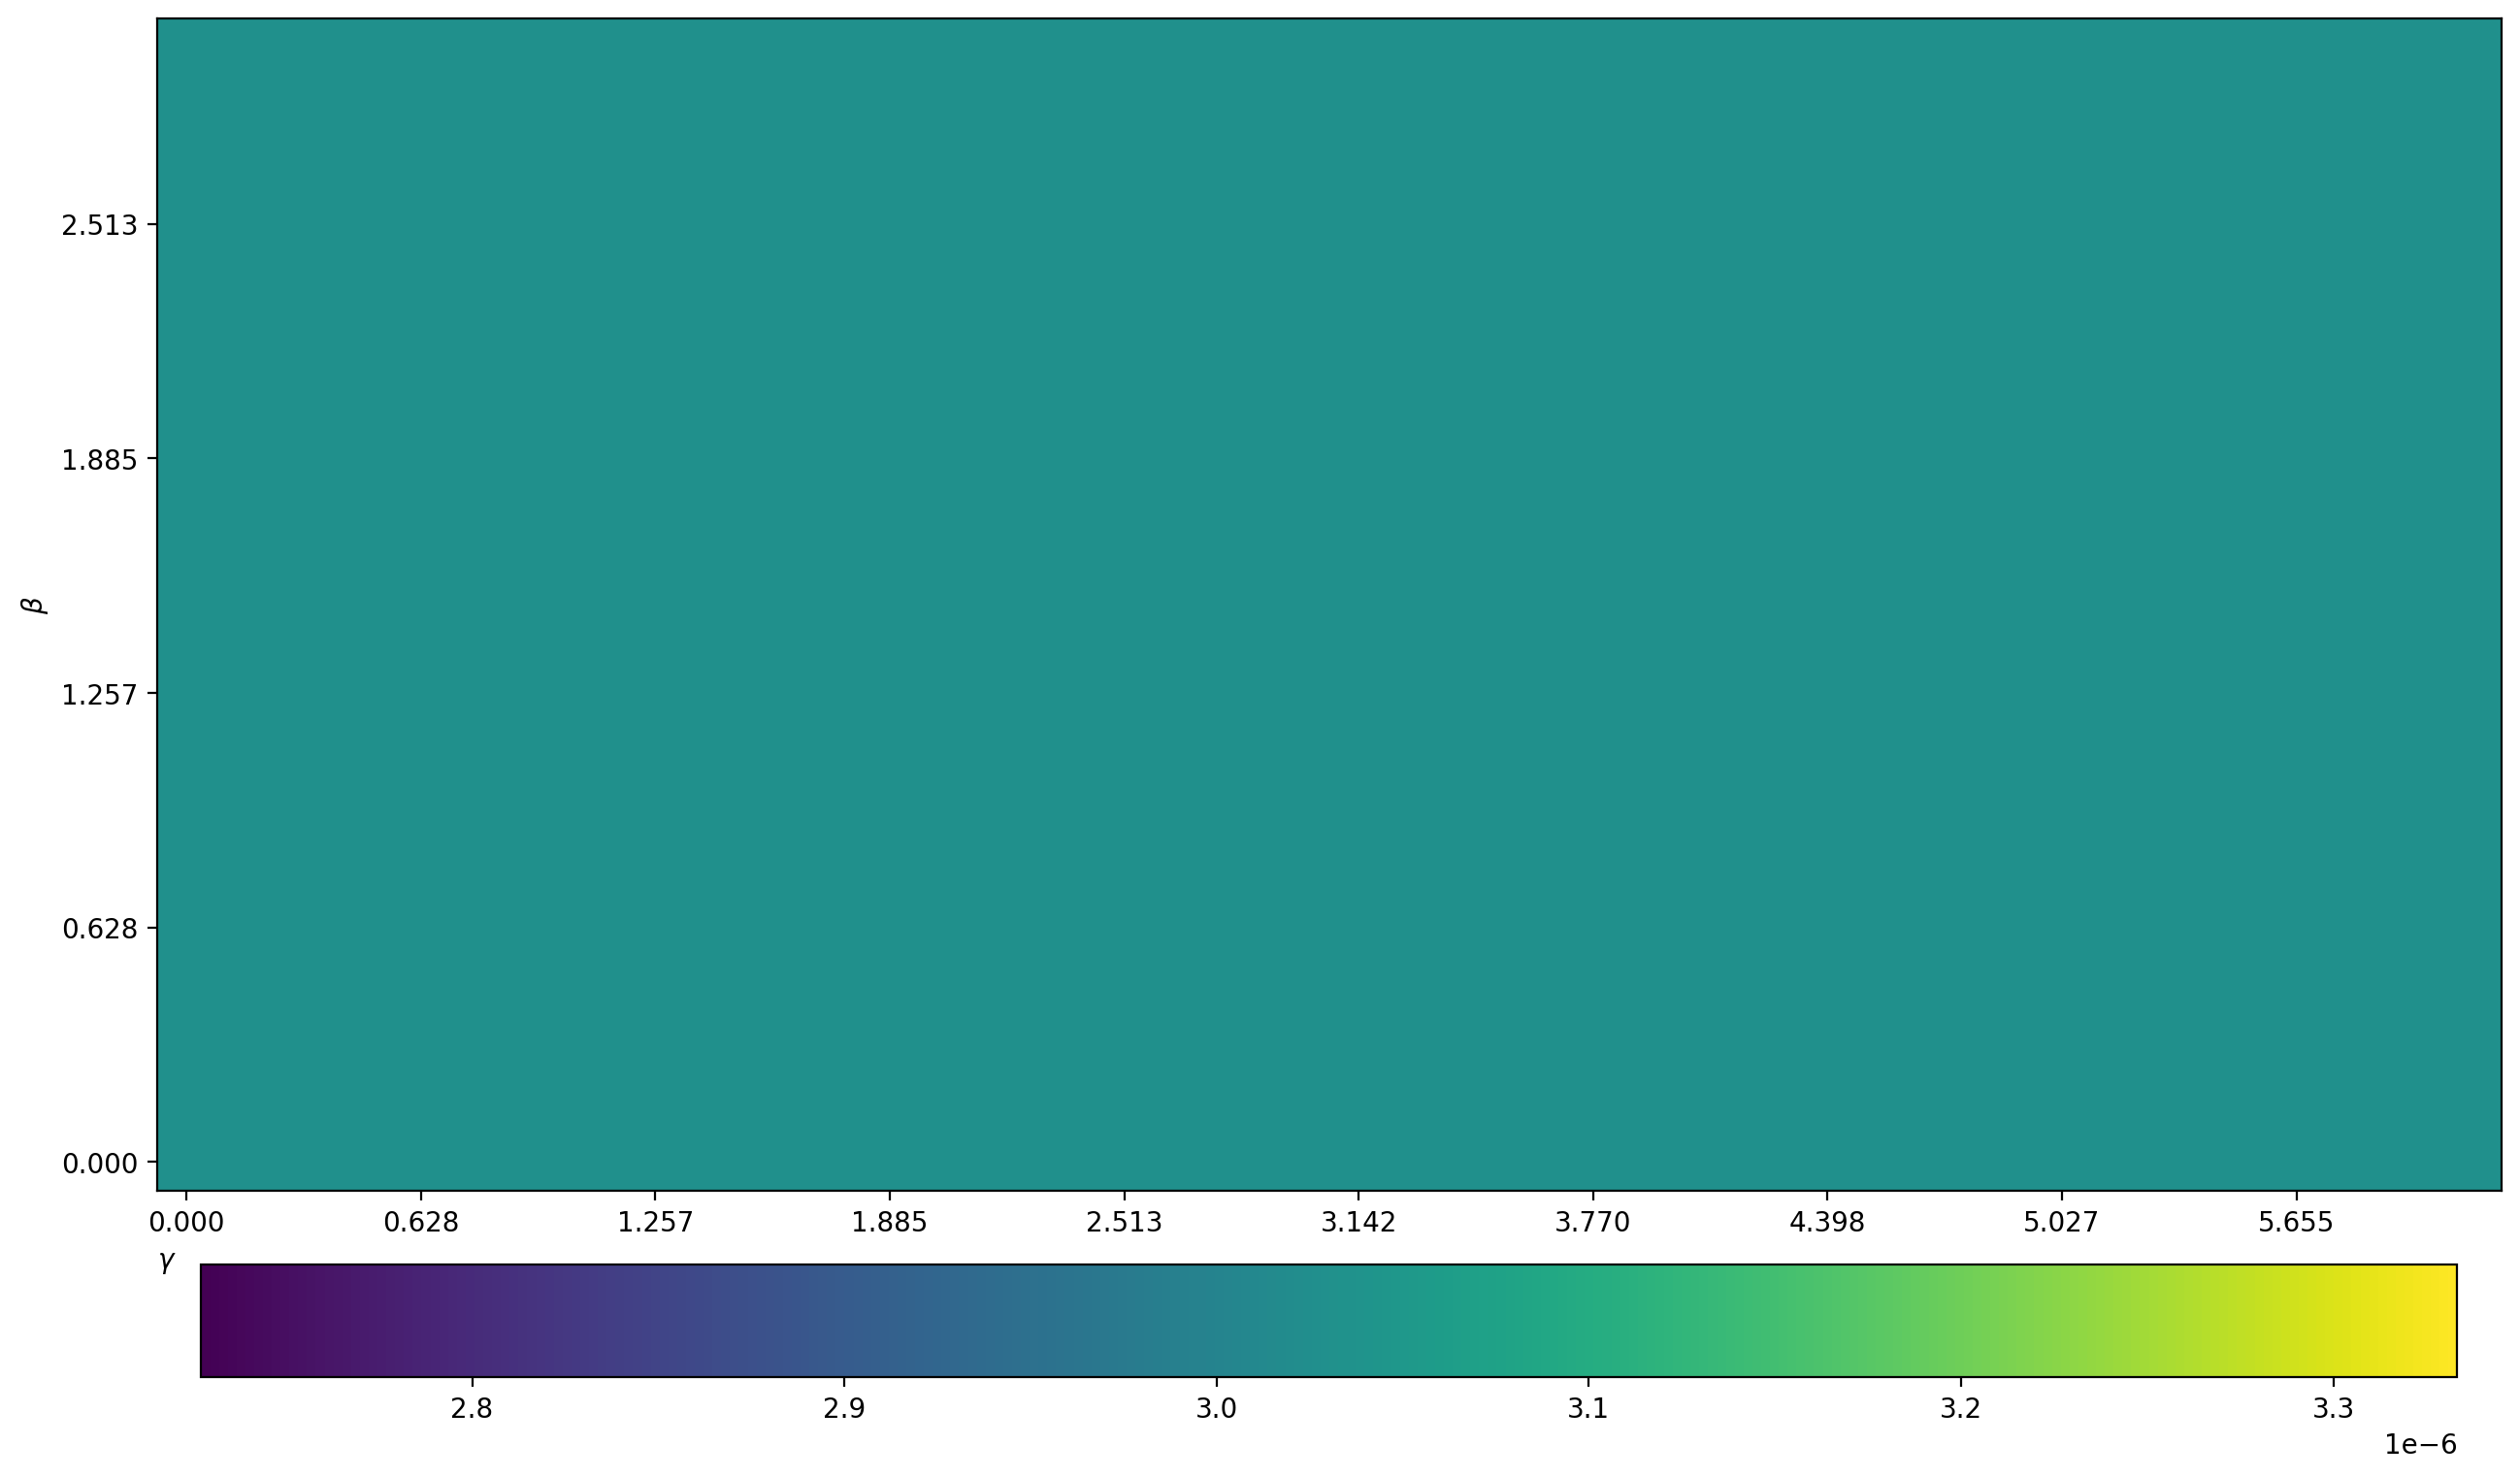

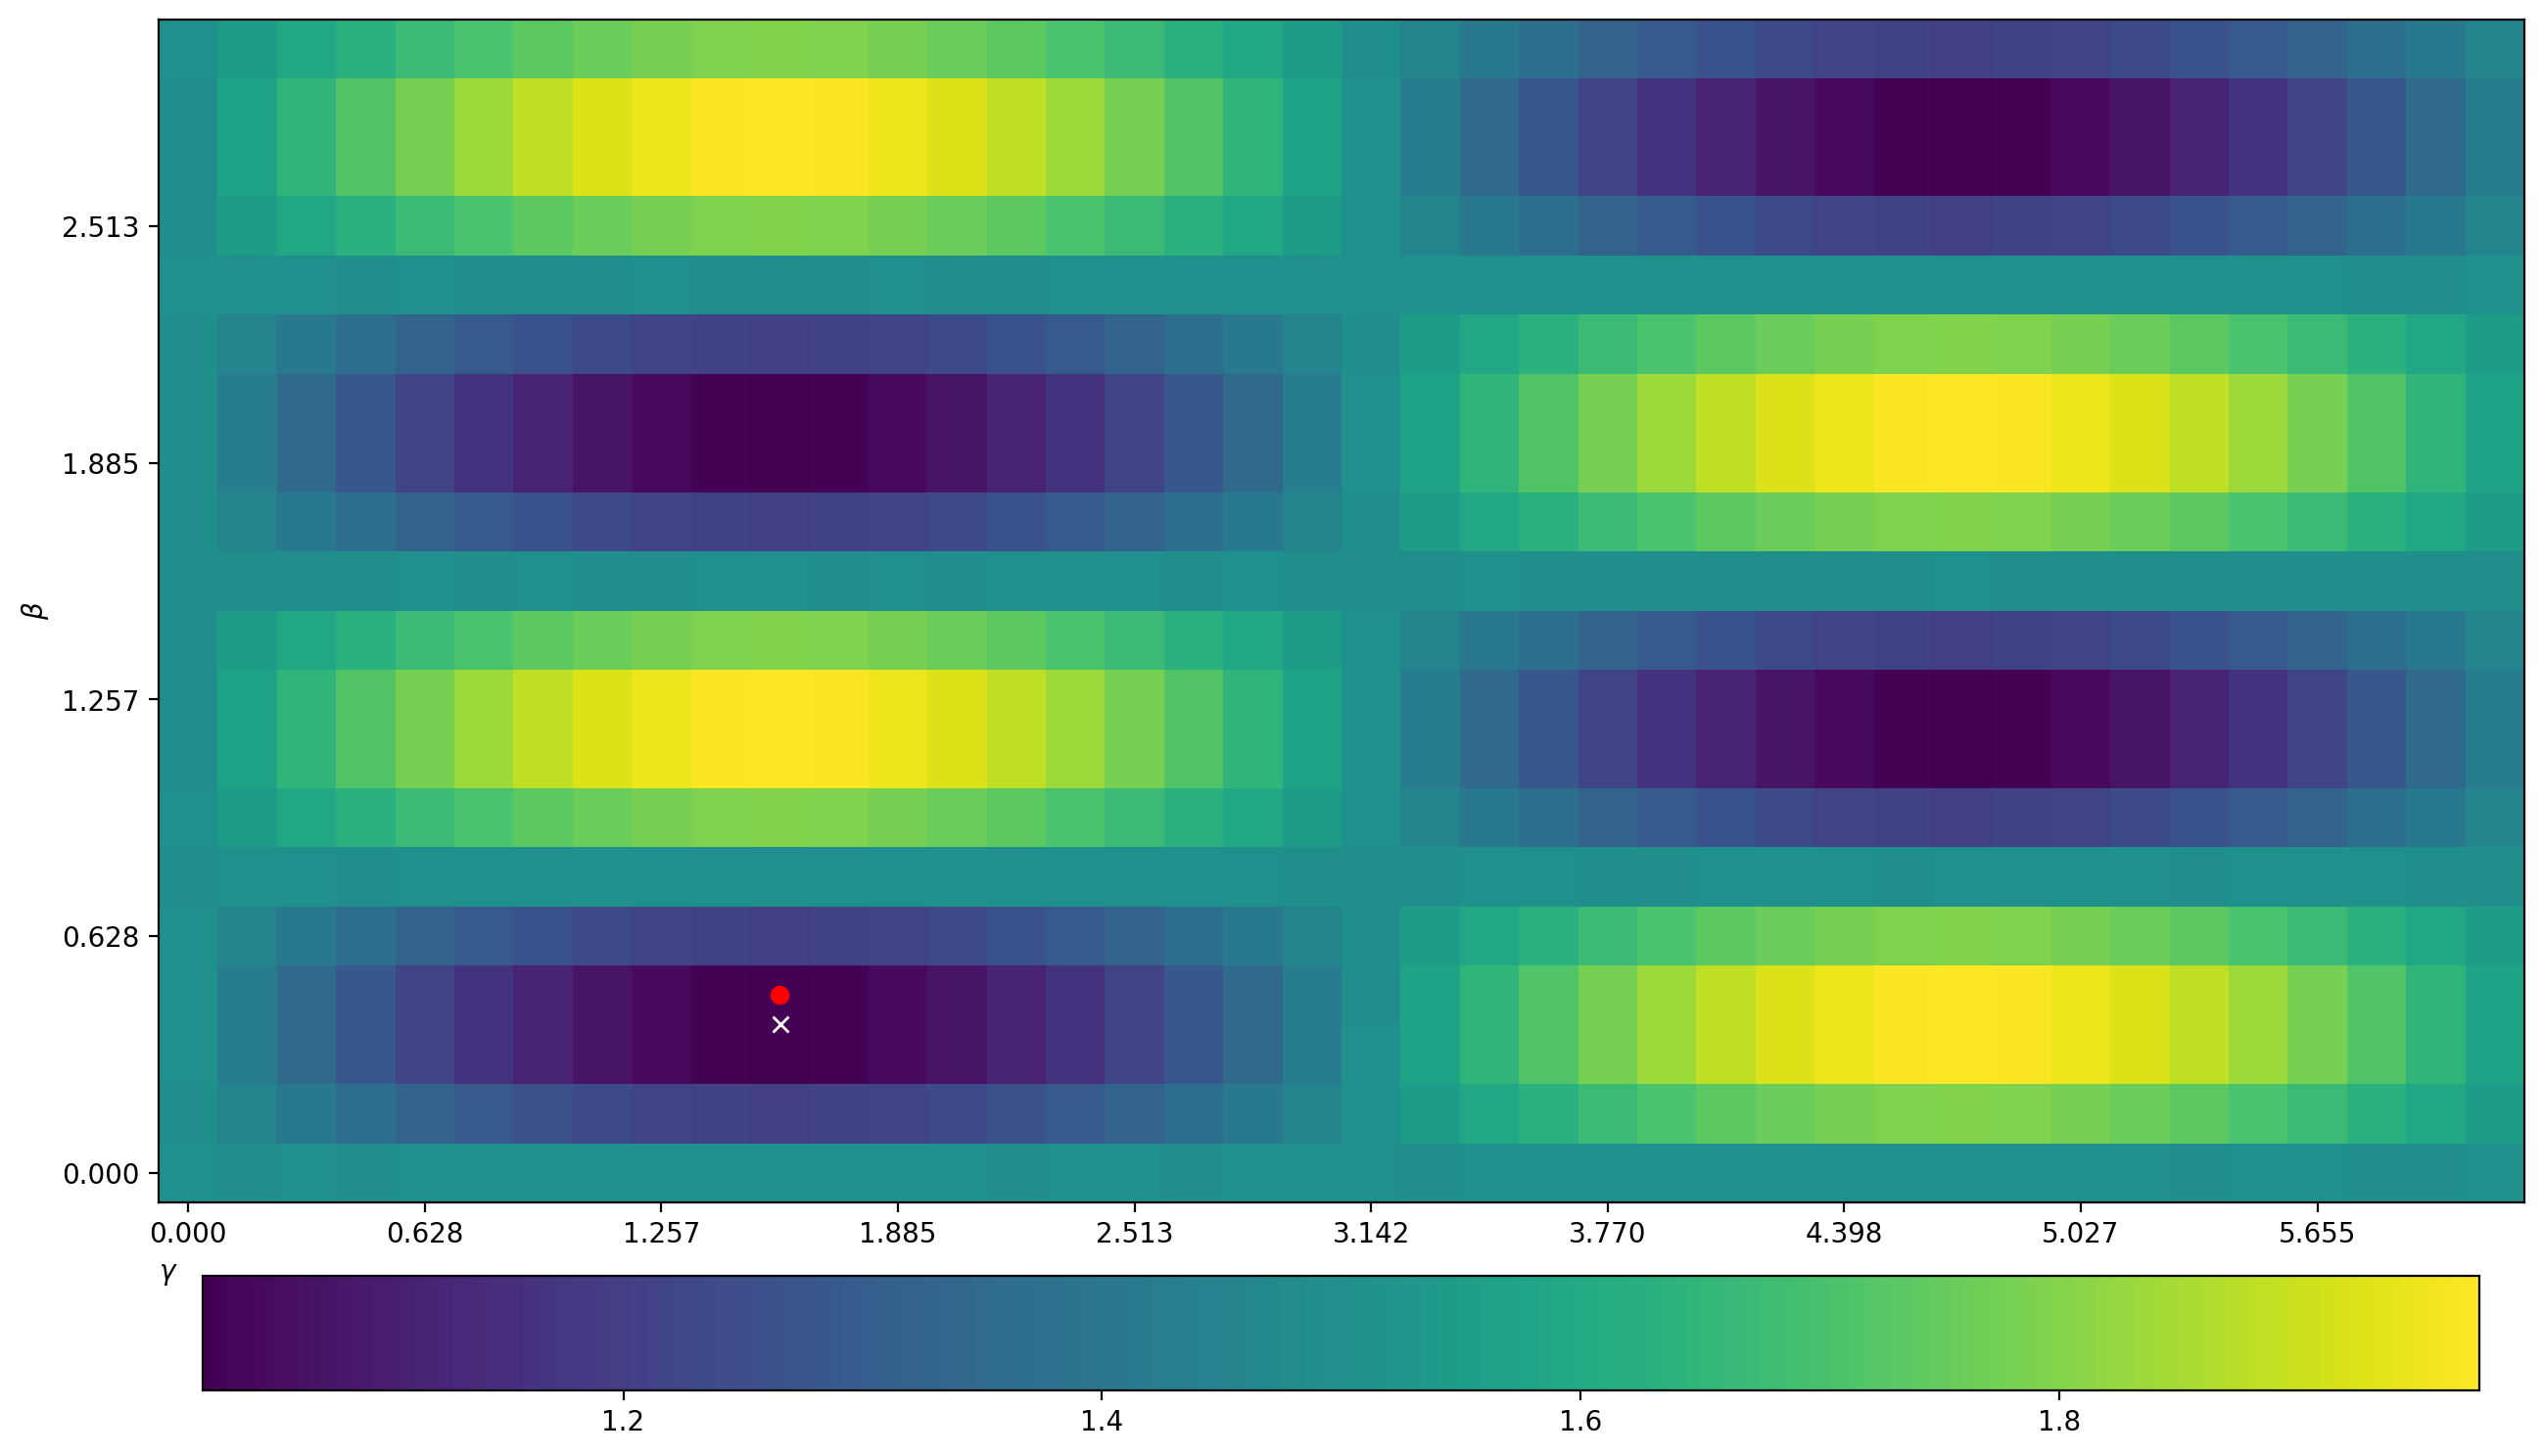

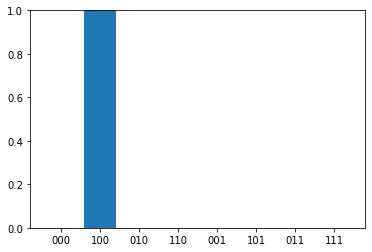

In [19]:
qaoa=QAOAChoose(CR, FR)

mu=1

E, Ecost, Eexco, x0, job, ji = qaoa.getElandscape(backend,mu,useExco=[False],sv=sv,mixerbinstring='001<->110')
out, job_b, xb = qaoa.getlocalmin(x0, backend, mu,useExco=[False],sv=sv, mixerbinstring='001<->110')

# plot landscape
_=getfig(Ecost)
# plot landscape
_=getfig(Eexco)
# plot landscape
_=getfig(E)
pl.plot(x0[0],x0[1],'ro')
pl.plot(xb[0],xb[1],'wx')

# plot histogram
md=job_b.result().get_counts()
pl.figure()
pl.bar([k[::-1] for k in md.keys()], md.values())
pl.ylim([0,1])

In [20]:
x1=x0+np.array((0,1))

Optimization terminated successfully.
         Current function value: 1.500003
         Iterations: 20
         Function evaluations: 38


(0.0, 1.0)

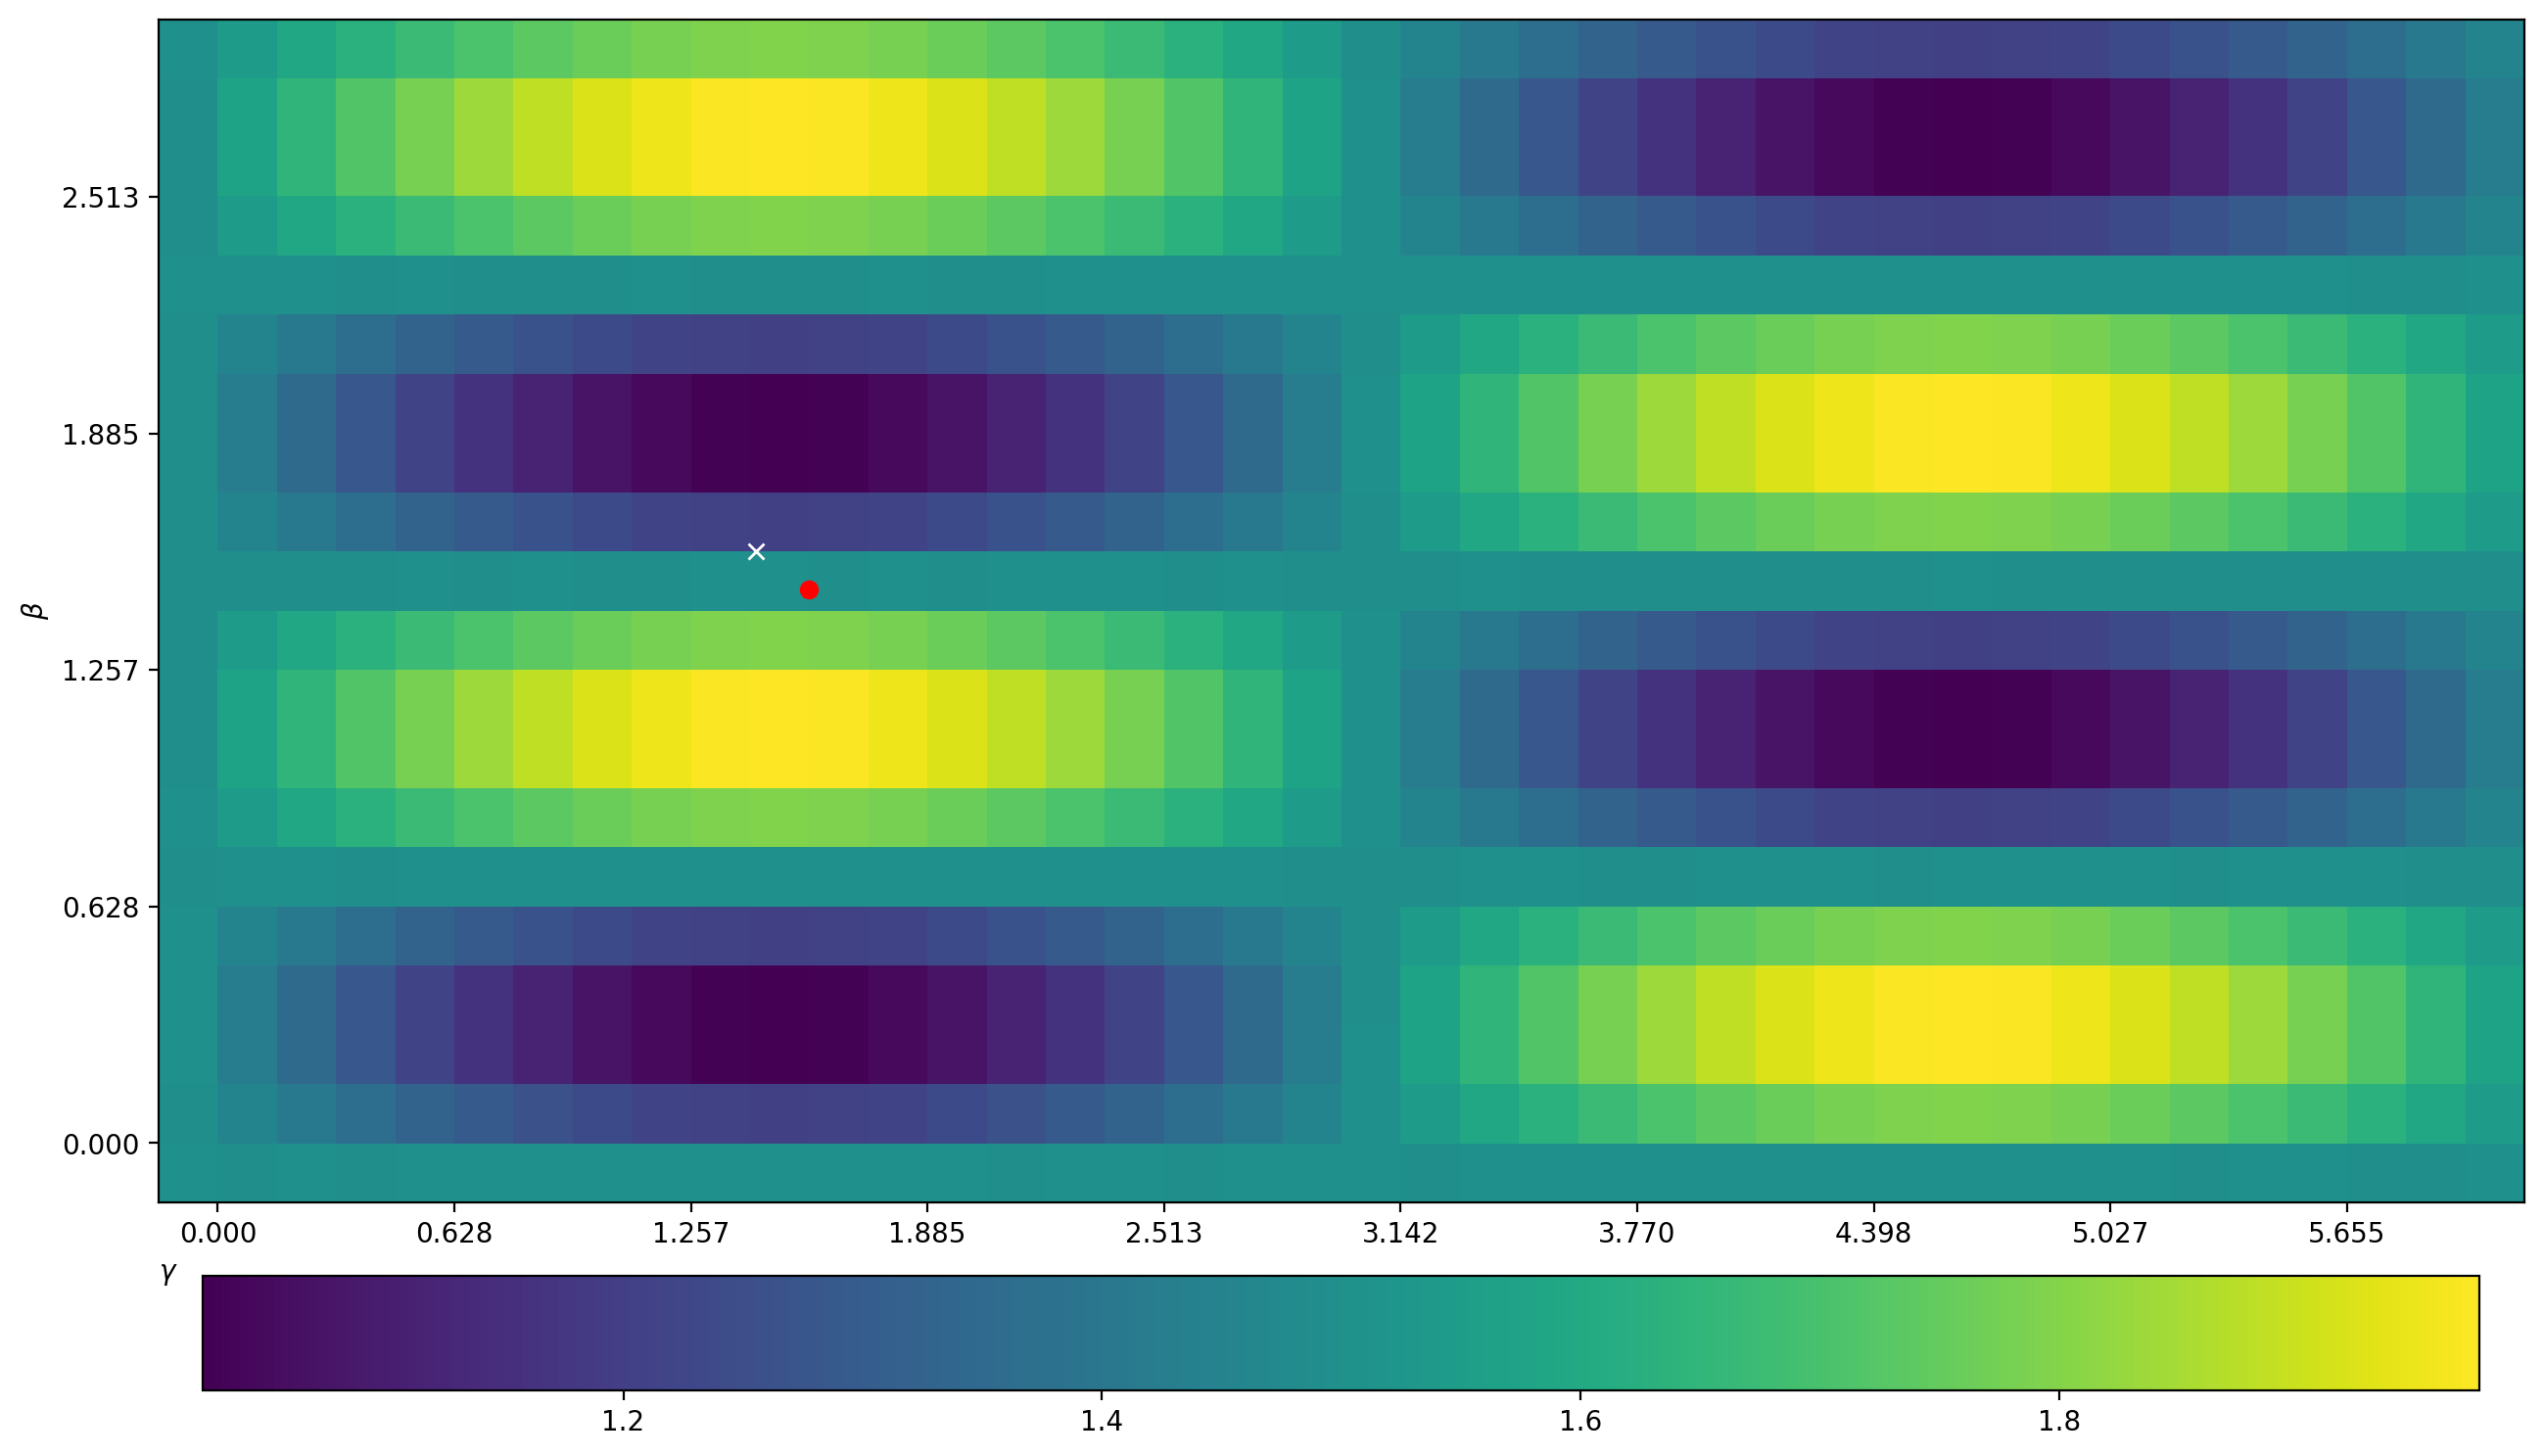

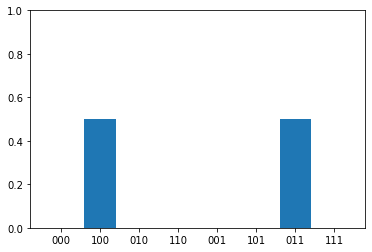

In [21]:
out, job_b, xb = qaoa.getlocalmin(x1, backend, mu,useExco=[False],sv=sv)

_=getfig(E,ng=20,nb=10)
pl.plot(x0[0],x1[1],'ro')
pl.plot(xb[0],xb[1],'wx')

# plot histogram
md=job_b.result().get_counts()
pl.figure()
pl.bar([k[::-1] for k in md.keys()], md.values())
pl.ylim([0,1])

In [22]:
qaoa.createCircuit(x0, useExco=[False],sv=sv).draw()

»
q_0: »
     »
q_1: »
     »
q_2: »
     »
«     ┌────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐»
«q_0: ┤0                                                                                                                                                                                                   ├»
«     │                                                                                                                                                                                                    │»
«q_1: ┤1 Initialize(-0.00052839-0.00059761j,-0.70711+0.00060501j,0.00012489-0.00032502j,0.00012489-0.00032502j,0.00012489-0.00032502j,0.00012489-0.00032502j,-0.70711+0.00060501j,-0.00052839-0.00059761j) ├»
«     │                                                                                                                                                                                                    │»
«q_2: ┤2                                                                                                                                                                                                   ├»
«     └────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘»
«     ┌─────────┐┌────────────┐
«q_0: ┤ Rz(π/2) ├┤ Rx(-3π/10) ├
«     ├─────────┤├────────────┤
«q_1: ┤ Rz(π/2) ├┤ Rx(-3π/10) ├
«     ├─────────┤├────────────┤
«q_2: ┤ Rz(π/2) ├┤ Rx(-3π/10) ├
«     └─────────┘└────────────┘

In [23]:
qaoa.cost_vector(1,plotsolutions=True)

[1 0 0] 1.0
[0 1 1] 2.0
min cost= 1.0


(array([2., 1., 2., 3., 2., 3., 2., 5.]),
 array([0., 1., 1., 2., 1., 2., 2., 3.]),
 array([2., 0., 1., 1., 1., 1., 0., 2.]))